In [473]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", color_codes=True)

In [474]:
col_names = ['age', 'workclass', 'fnlwgt', 'education',
            'education-num', 'marital-status', 'occupation',
            'relationship', 'race', 'sex', 'capital-gain',
            'capital-loss', 'hours-per-week', 'native-country',
            'income'
            ]

# data/adult.csv has been preprocessed by scripts/preproccess_csv.py
# merged adult.data and adult.test and removed extra spaces after comma
# na_values='?' is used to replace unknown values with NaN as explained in data/adult.names description
df = pd.read_csv('data/adult.csv', header=None, names=col_names, na_values='?')

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [476]:
# df['income'] has string values, a 0 1 encoding is used to convert it to numerical values
df['income-encoded'] = df['income'].map({'<=50K': 0, '>50K': 1})

cat_vars = list(df.select_dtypes(include=['object']).columns)
num_vars = list(df.select_dtypes(include=np.number).columns)

df_categorial = df[cat_vars]
df_numerical = df[num_vars]

print(f'{cat_vars=}') # cat_vars = ['workclass', 'education', ..., 'native-country', 'income']
print(f'{num_vars=}') # num_vars = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

cat_vars=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
num_vars=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income-encoded']


## Data preparation

In [477]:
# Check for missing values
df.isna().sum()


age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
income-encoded       0
dtype: int64

In [478]:
# Check for duplicate rows
print(f"Total of {df.duplicated().sum()} duplicate entries found in the dataset")

Total of 52 duplicate entries found in the dataset


In [479]:
# Pipeline for cleaning data
def clean_data(df):
    # Drop rows with NaN values
    # '?' values has already been replaced with NaN values during pd.read_csv()
    df = df.dropna()
    # Drop duplicate rows
    df = df.drop_duplicates()

    return df

df = clean_data(df)
print(df.isna().sum())
print(f"Total of {df.duplicated().sum()} duplicate entries found in the dataset")

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
income-encoded    0
dtype: int64
Total of 0 duplicate entries found in the dataset


## Exploring the data

<=50K    33973
>50K     11202
Name: income, dtype: int64


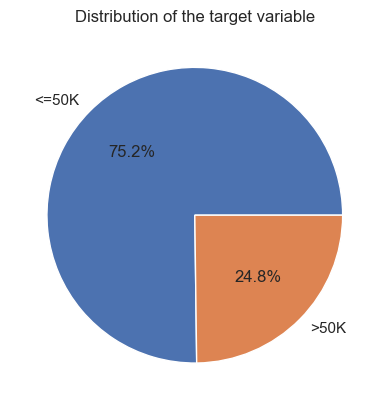

In [480]:
# Target variable's distribution
print(df['income'].value_counts())

# Pie Plot the distribution of the target variable
plt.pie(df['income'].value_counts(), labels=df['income'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of the target variable')
plt.show()

### Data Visualisation

In [481]:
# function to plot the distribution and distribution according to 'income' variable
def plot_column(df, col, target='income', bins=None):
    # Create a figure with two subplots vertically stacked
    fig, (ax1, ax2) = plt.subplots(nrows= 2, ncols=1, figsize=(10, 10))

    fig.suptitle(f'Analysis of {col}')

    # Histogram of the column
    if (col in cat_vars):
        sns.countplot(data=df, y=col, ax=ax1, order=df[col].value_counts().index)
        sns.countplot(data=df, y=col, hue=target, ax=ax2, order=df[col].value_counts().index)
        
    else: # col in num_vars
        sns.histplot(data=df, x=col, ax=ax1, kde=True)
        # Each column has its name to the range of the bin
        if(bins):
            sns.histplot(data=df, x=col, bins=bins, hue=target, multiple="stack", ax=ax2)
            ax2.set_xlabel(f"{col} - Divided into {bins} bins")
        else:
            sns.histplot(data=df, x=col, hue=target, multiple="stack", ax=ax2)


    ax1.set_title(f'Distribution of {col}')
    ax2.set_title(f'Distribution of {col} according to {target}')
    

    plt.show()


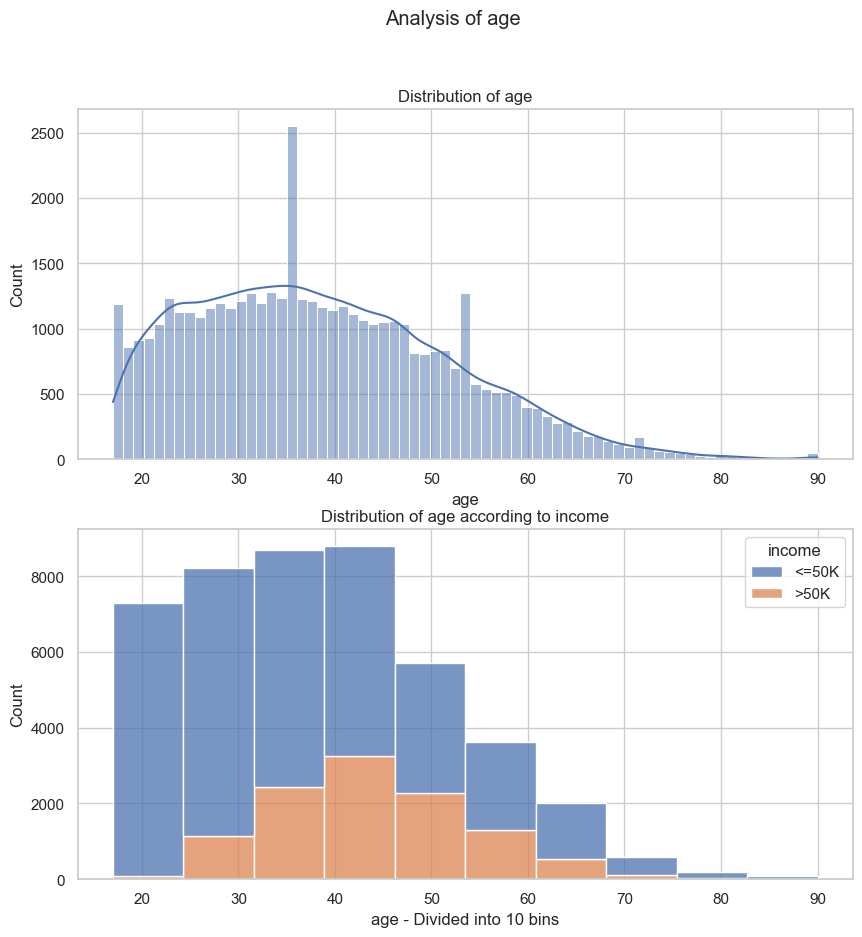

In [482]:
# Plot Age, Age vs. Income
plot_column(df, 'age', bins=10)

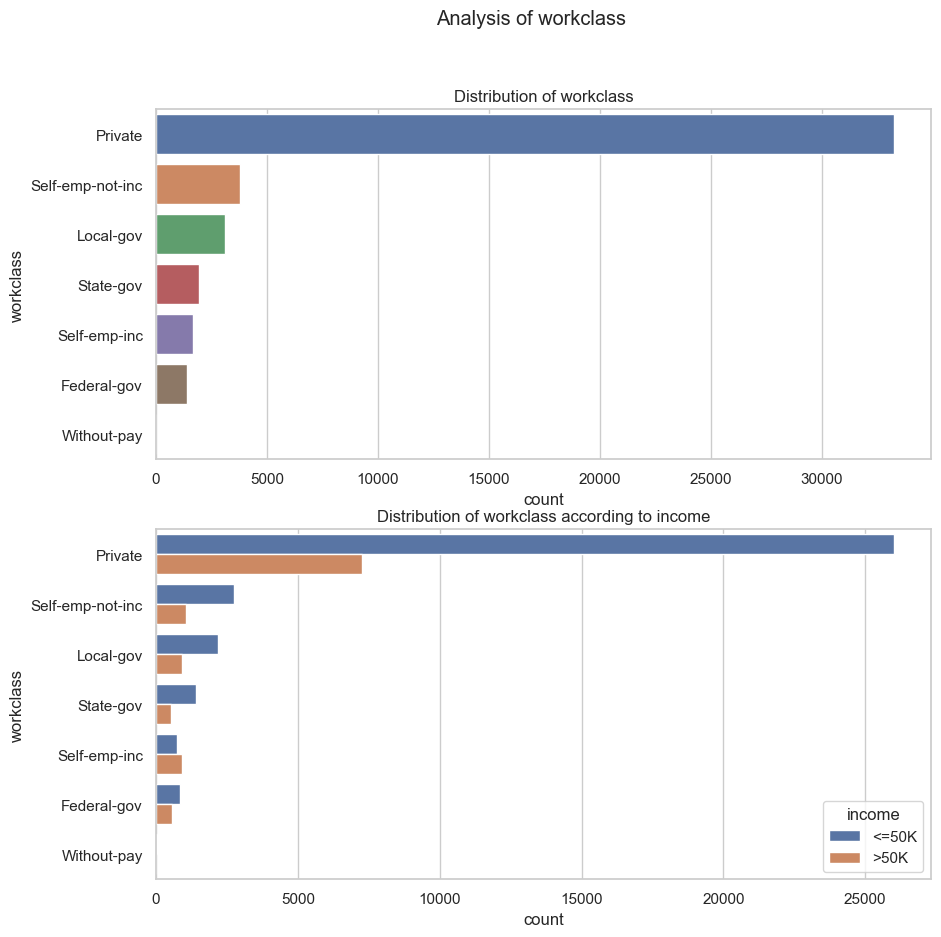

In [483]:
# Plot workclass, workclass vs. Income
plot_column(df, 'workclass')

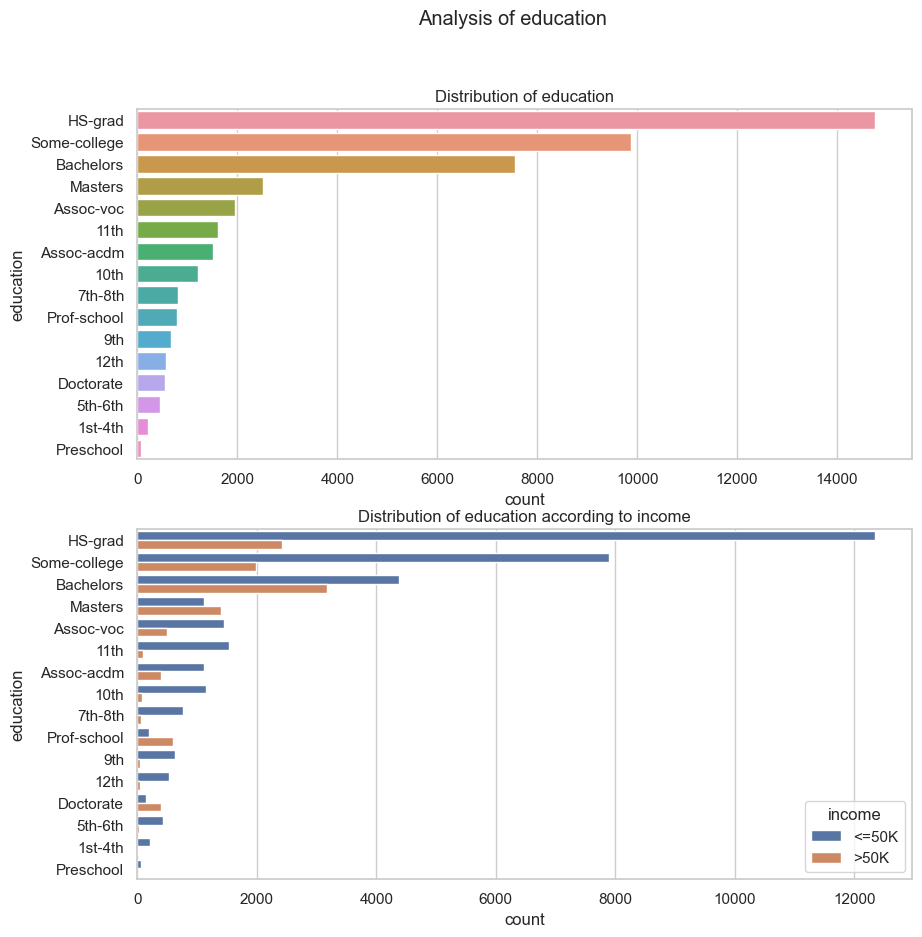

In [484]:
# Plot education, education vs. Income
plot_column(df, 'education')

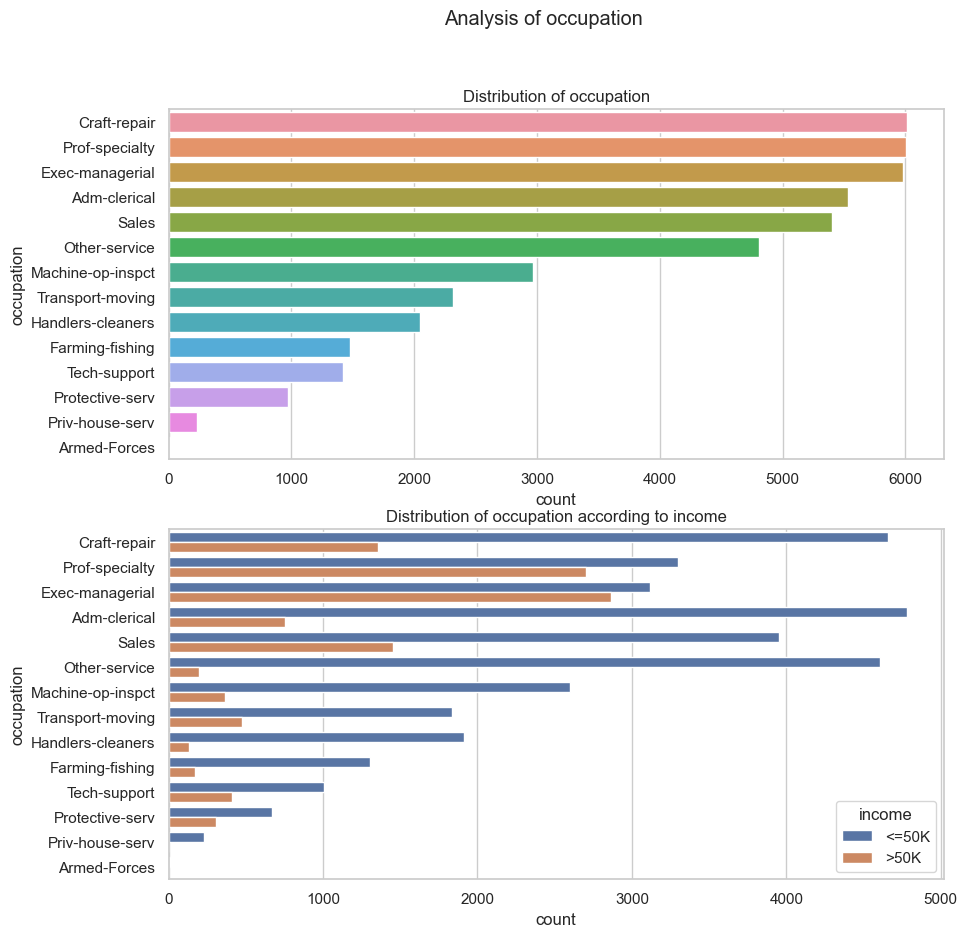

In [485]:
# Plot occupation, occupation vs. Income
plot_column(df, 'occupation')

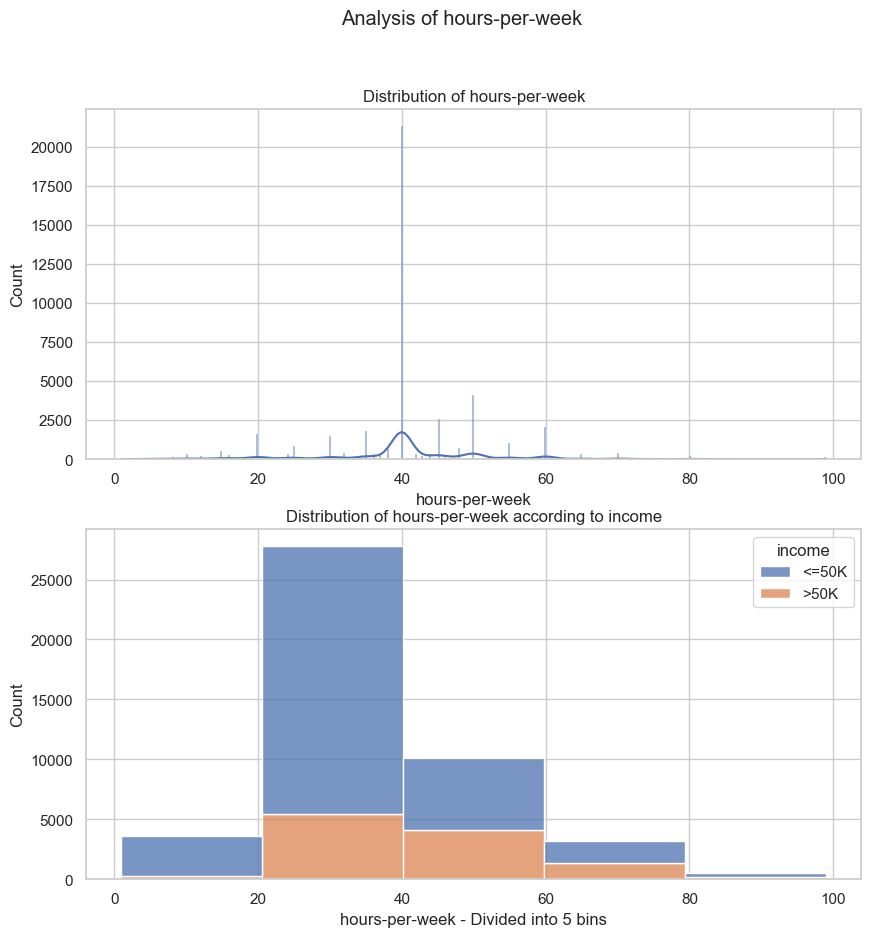

In [486]:
# Plot hours-per-week, hours-per-week vs. Income
plot_column(df, 'hours-per-week', bins=5)

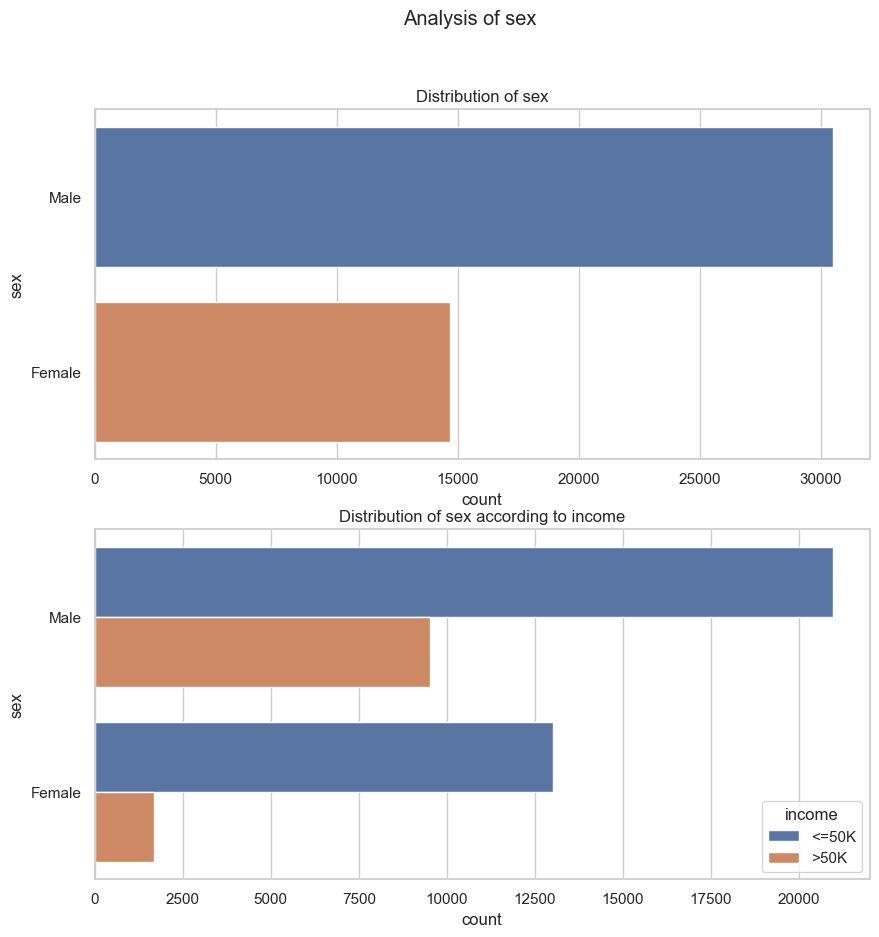

In [487]:
# Plot sex, sex vs. Income
plot_column(df, 'sex')

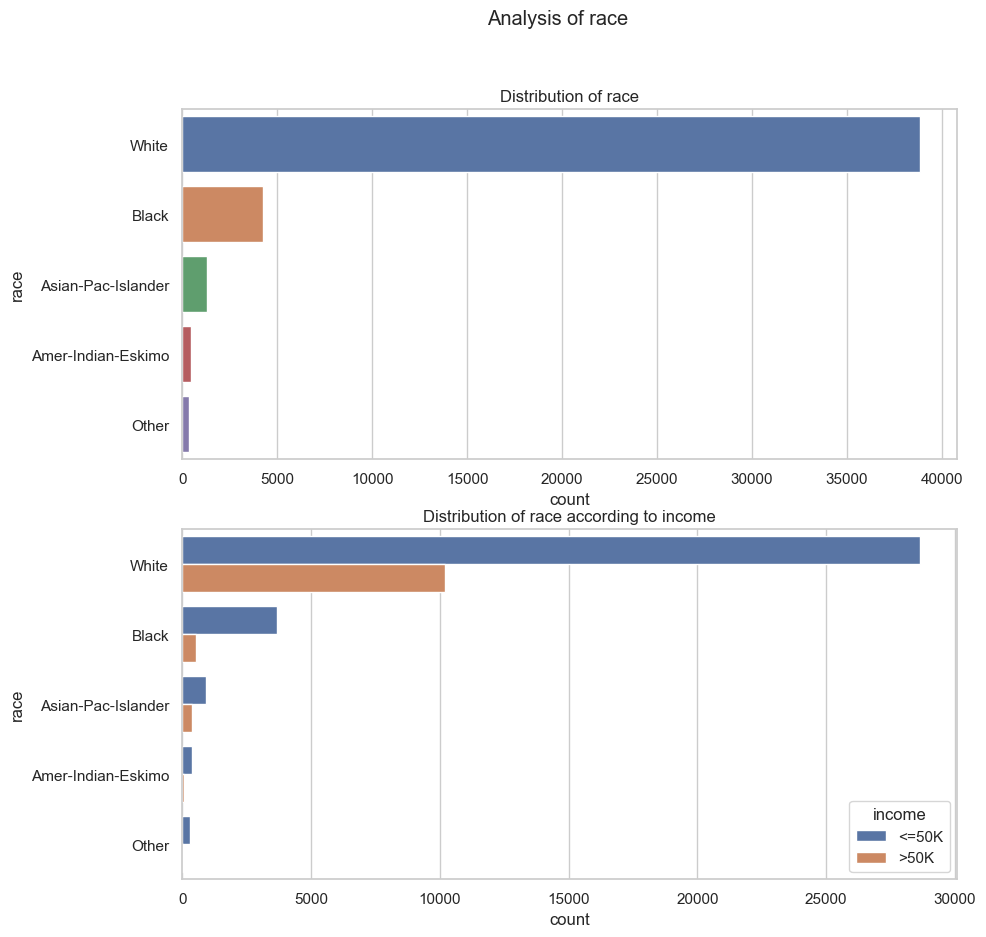

In [488]:
# Plot race vs. Income
plot_column(df, 'race')

In [489]:
# Plot native-country vs. Income
# plot_column(df[df['native-country'] != 'United-States'], 'native-country')

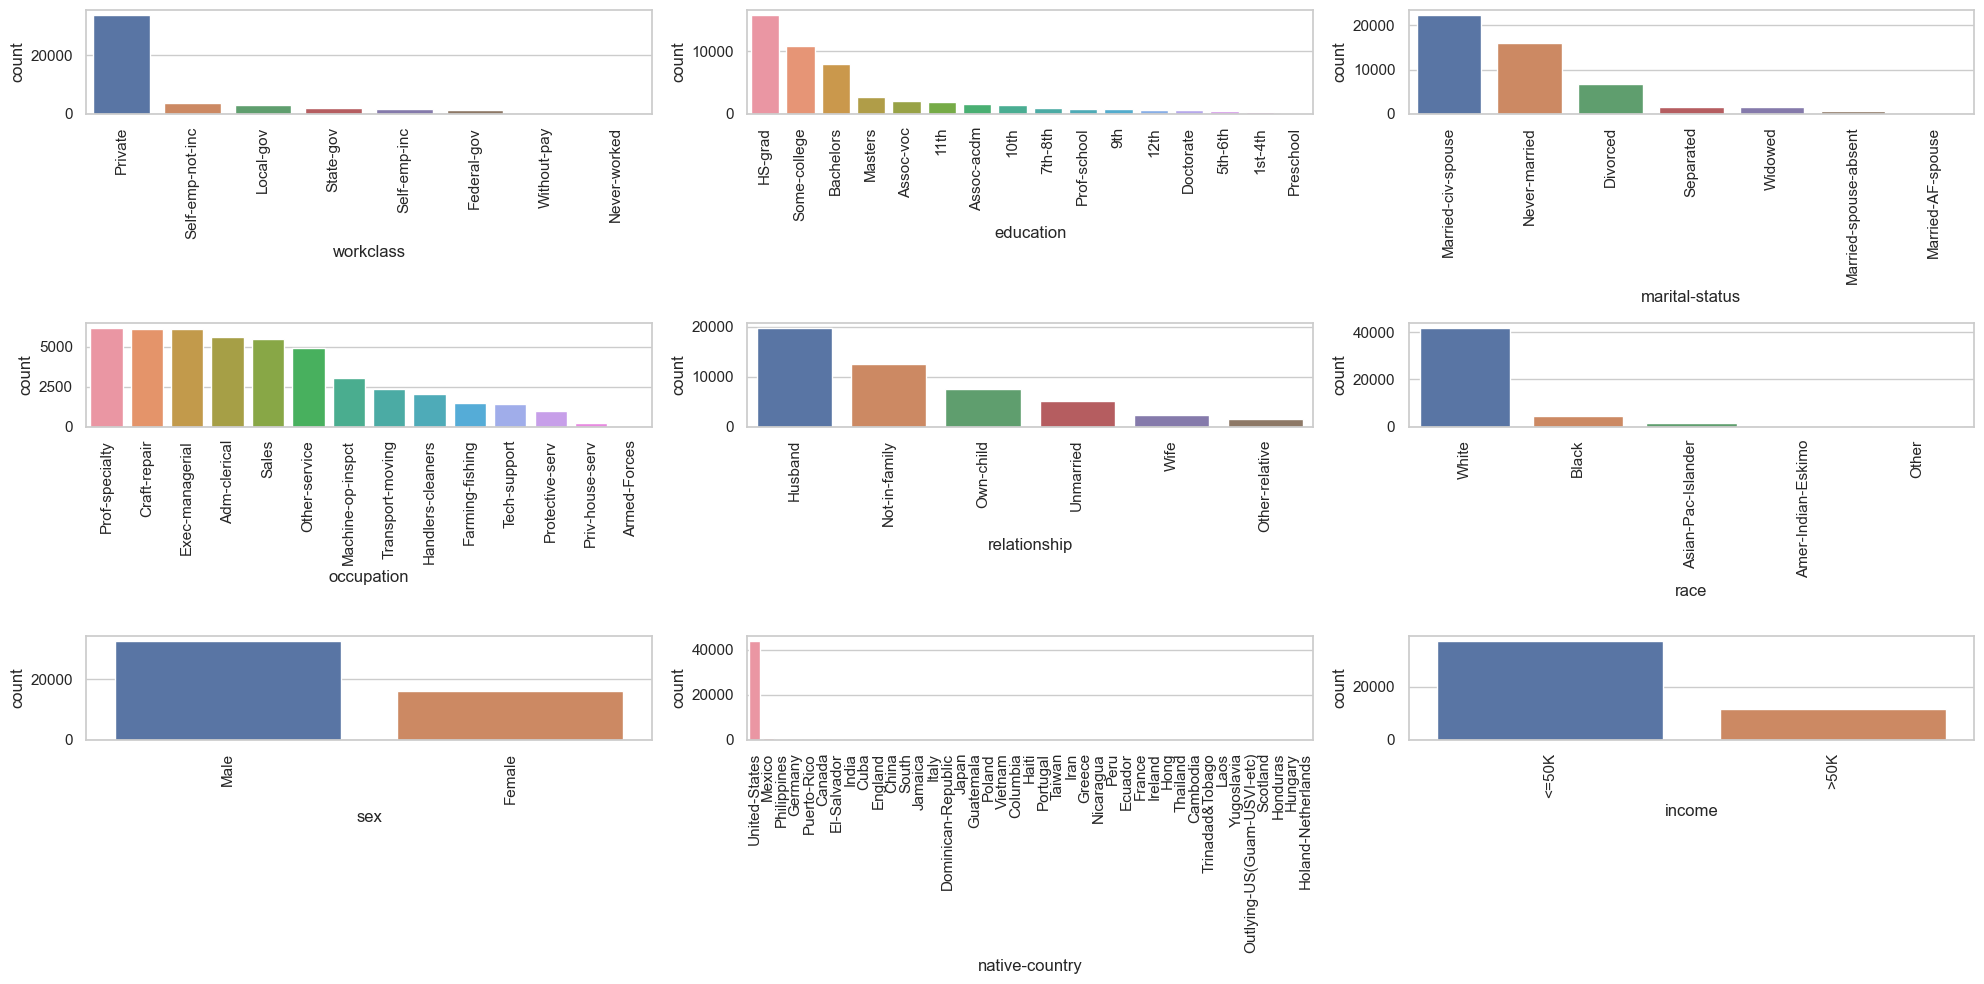

In [490]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
axs = ax.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df_categorial, ax=axs[i], order=df_categorial[var].value_counts().index)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_xlabel(var)

fig.tight_layout()

plt.show()

/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_64342/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_64342/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_64342/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_64342/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_64342/482783700.py:6: UserWarning: FixedFormatter should only

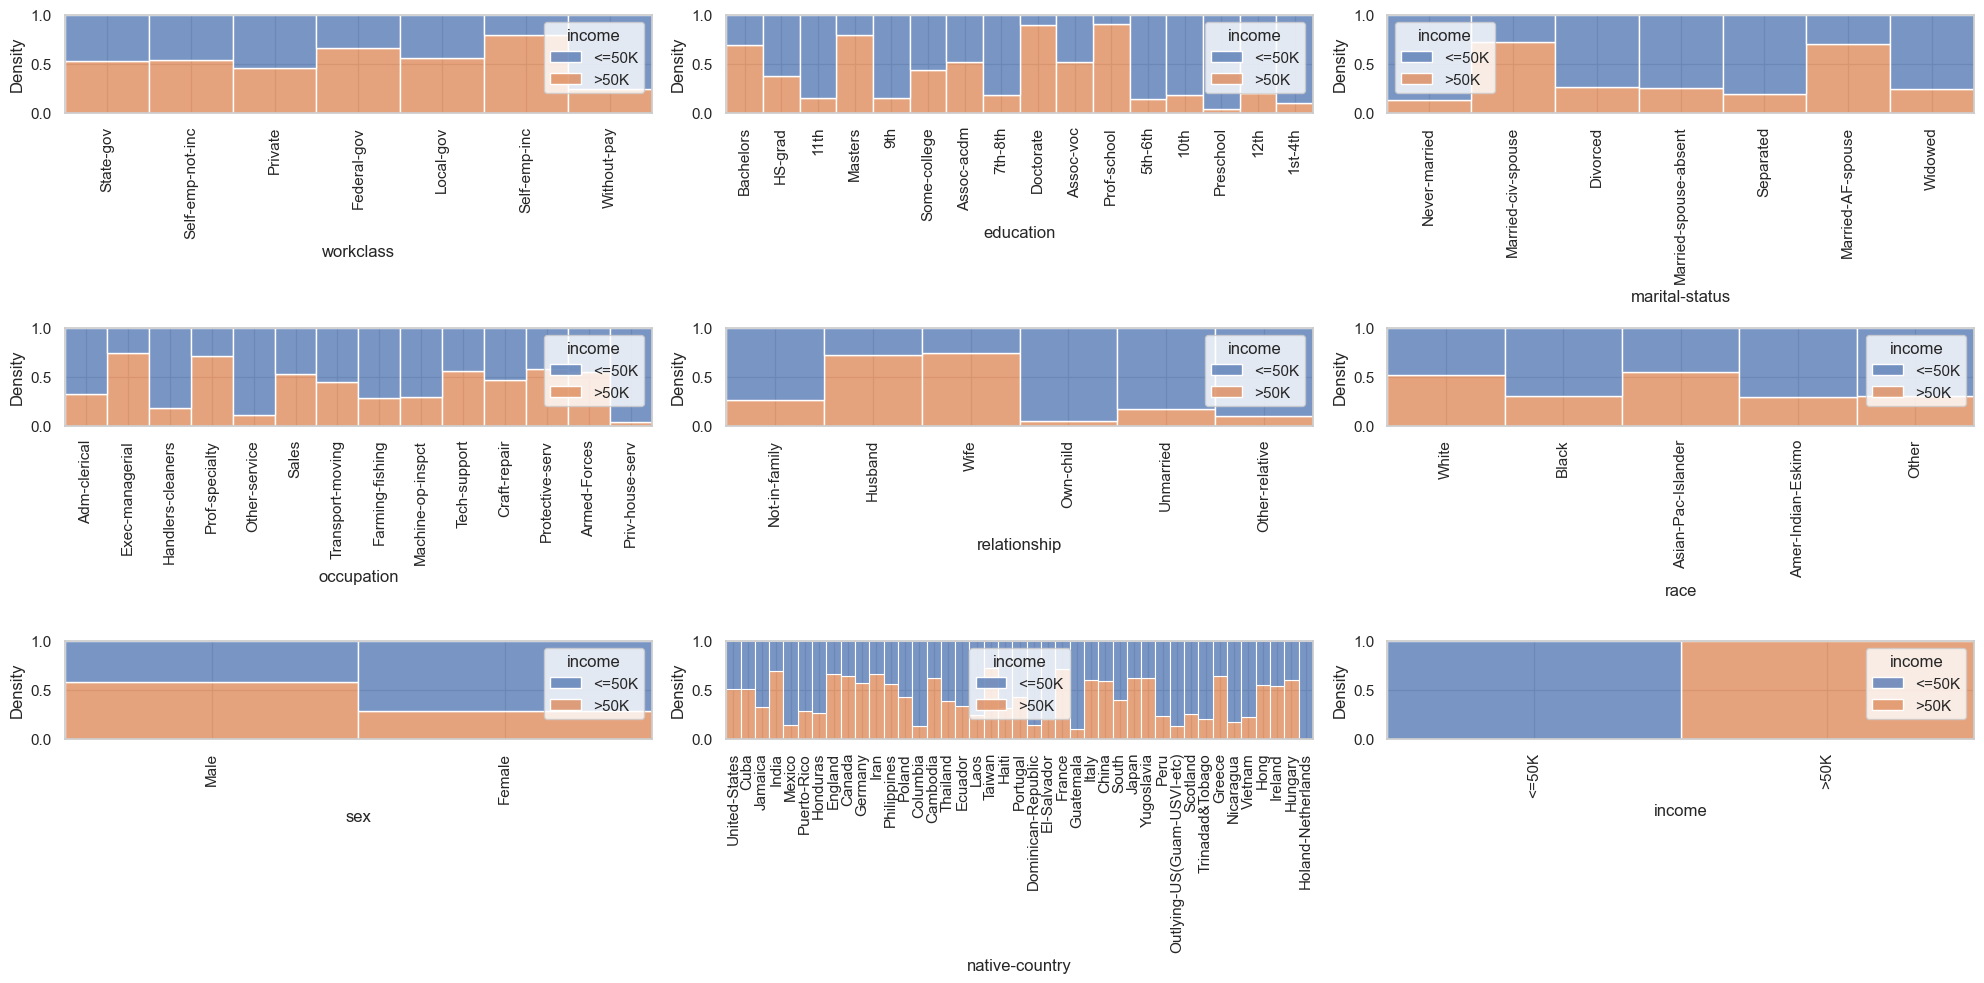

In [491]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
axs = ax.flatten()

for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue="income", data=df, ax=axs[i], multiple="fill", kde=False, element="bars" , fill=True, stat="density", common_norm=False, common_bins=False, discrete=(var in cat_vars))
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_xlabel(var)

fig.tight_layout()

plt.show()

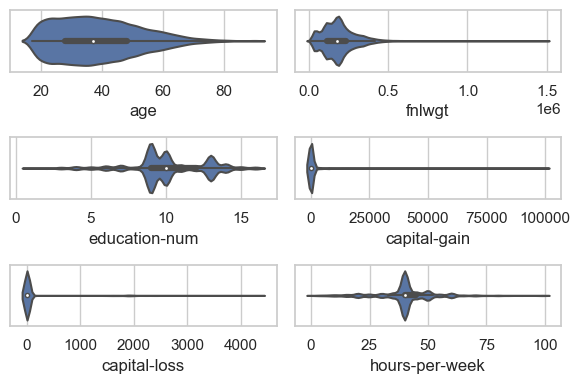

In [492]:
fig, ax = plt.subplots(3, 2, figsize=(6, 4))
axs = ax.flatten()

for i, var in enumerate(num_vars[:-1]): # exclude 'income-encoded'
    sns.violinplot(x=var, data=df_numerical, ax=axs[i])

fig.tight_layout()

plt.show()

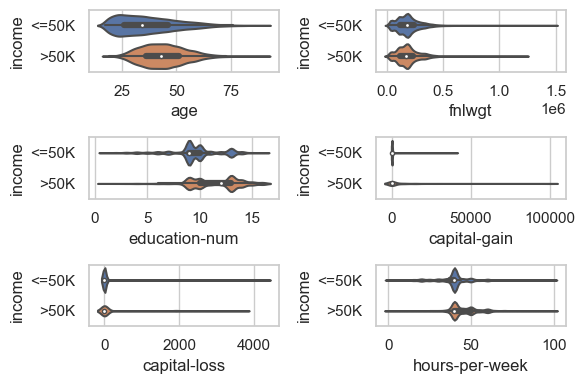

In [493]:
fig, ax = plt.subplots(3, 2, figsize=(6, 4))
axs = ax.flatten()

for i, var in enumerate(num_vars[:-1]): # exclude 'income-encoded'
    sns.violinplot(x=var, y='income', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

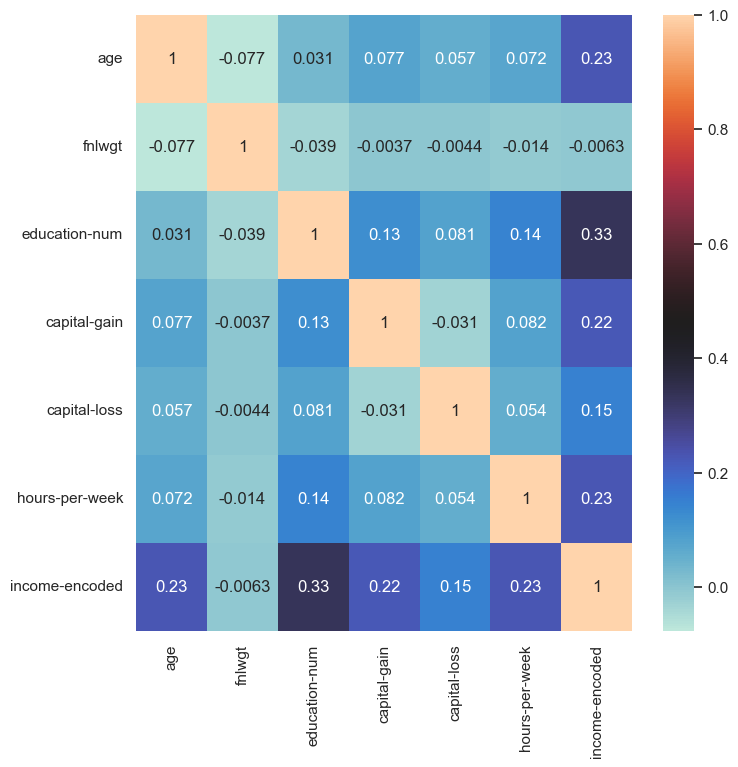

In [494]:
# plot correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='icefire')

plt.show()

## Data Preprocessing

In [495]:
df_processed = df.copy()

In [496]:
# create a df to map education-num to education
edu_map = df_processed[['education', 'education-num']].drop_duplicates().sort_values(by='education-num').reset_index(drop=True)

# Drop education column
df_processed.drop('education', axis=1, inplace=True)

In [497]:
# we encoded income into 0 and 1, 0 for <=50K and 1 for >50K at first,
# now we don't two columns for income, we only need one column
df_processed['income'] = df_processed['income'].map({'<=50K': 0, '>50K': 1})
df_processed.drop('income-encoded', axis=1, inplace=True)

In [498]:
# refresh cat_vars and num_vars
num_vars = list(df_processed.select_dtypes(include=np.number).columns)
cat_vars = list(df_processed.select_dtypes(include=['object']).columns)

print(num_vars)
print(cat_vars)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


### Normalisation of Numerical Data

In [499]:
from sklearn.preprocessing import StandardScaler

def normalize_col(df, columnname, scaler=StandardScaler()):
    return scaler.fit_transform(df[columnname].values.reshape(-1, 1)) # Column vector

In [500]:
# num_arr_scaled = np.concatenate([normalize_col(df, column) for column in num_vars], axis=1)
for col in num_vars:
    df_processed[col] = normalize_col(df_processed, col)

df_processed.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,4.517500e+04,4.517500e+04,4.517500e+04,4.517500e+04,4.517500e+04,4.517500e+04,4.517500e+04
mean,1.509952e-17,-1.410862e-16,-2.878347e-17,-5.347748e-18,1.132464e-17,-9.201273e-17,-1.557138e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-1.631165e+00,-1.668194e+00,-3.573803e+00,-1.468112e-01,-2.188995e-01,-3.326437e+00,-5.742233e-01
25%,-7.987899e-01,-6.847651e-01,-4.386522e-01,-1.468112e-01,-2.188995e-01,-7.849301e-02,-5.742233e-01
50%,-1.177561e-01,-1.081558e-01,-4.675833e-02,-1.468112e-01,-2.188995e-01,-7.849301e-02,-5.742233e-01
75%,6.389482e-01,4.558791e-01,1.128923e+00,-1.468112e-01,-2.188995e-01,3.379100e-01,-5.742233e-01
max,3.892776e+00,1.231089e+01,2.304605e+00,1.316834e+01,1.053262e+01,4.835063e+00,1.741483e+00


### Encoding Categorical Data

In [501]:
# Label Encoding
for col in cat_vars:
    print(f'{col} -> {len(df_processed[col].unique())} unique values, e.g {df_processed[col].unique()[:3]}')

workclass -> 7 unique values, e.g ['State-gov' 'Self-emp-not-inc' 'Private']
marital-status -> 7 unique values, e.g ['Never-married' 'Married-civ-spouse' 'Divorced']
occupation -> 14 unique values, e.g ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners']
relationship -> 6 unique values, e.g ['Not-in-family' 'Husband' 'Wife']
race -> 5 unique values, e.g ['White' 'Black' 'Asian-Pac-Islander']
sex -> 2 unique values, e.g ['Male' 'Female']
native-country -> 41 unique values, e.g ['United-States' 'Cuba' 'Jamaica']


In [502]:
from sklearn.preprocessing import LabelEncoder

def encode_labels(df, col, label_encoder=LabelEncoder()):
    label_encoder.fit(df[col].unique())
    return label_encoder.transform(df[col])


In [503]:
for col in cat_vars:
    df_processed[col] = encode_labels(df_processed, col)
    print (f" {col}: {df_processed[col].unique()}")
    

 workclass: [5 4 2 0 1 3 6]
 marital-status: [4 2 0 3 5 1 6]
 occupation: [ 0  3  5  9  7 11 13  4  6 12  2 10  1  8]
 relationship: [1 0 5 3 4 2]
 race: [4 2 1 0 3]
 sex: [1 0]
 native-country: [38  4 22 18 25 32 15  8  1 10 19 29 30  3  0 36  6 24 35 13 31  5  7  9
 12 21  2 34 23 40 28 27 33 37 11 26 39 16 20 17 14]


### Final data preparation 

In [504]:
# pipeline for cleaning and preprocessing data

from sklearn.preprocessing import StandardScaler, LabelEncoder

def preprocess_data(df):
    # clean the data
    df = clean_data(df)
    
    df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype('int64')
    df.drop('income-encoded', axis=1, inplace=True)
    df.drop('education', axis=1, inplace=True)
    # normalize numerical columns and label encode categorical columns

    num_vars = list(df.select_dtypes(include=np.number).columns)
    cat_vars = list(df.select_dtypes(include=['object']).columns)
    num_vars.remove('income')

    scaler = StandardScaler()
    for col in num_vars:
        df[col] = normalize_col(df, col, scaler)
        
    label_encoder = LabelEncoder()
    for col in cat_vars:
        df[col] = encode_labels(df, col, label_encoder)

    return df

df = preprocess_data(df)

In [505]:
df.describe()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,4.517500e+04,45175.000000,4.517500e+04,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000,45175.000000,4.517500e+04,4.517500e+04,4.517500e+04,45175.000000,45175.000000
mean,1.509952e-17,2.204649,-1.410862e-16,-2.878347e-17,2.584549,5.970426,1.412905,3.680133,0.675042,-5.347748e-18,1.132464e-17,-9.201273e-17,36.403011,0.247969
std,1.000011e+00,0.958554,1.000011e+00,1.000011e+00,1.500600,4.026857,1.597630,0.832497,0.468365,1.000011e+00,1.000011e+00,1.000011e+00,6.078690,0.431839
min,-1.631165e+00,0.000000,-1.668194e+00,-3.573803e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.468112e-01,-2.188995e-01,-3.326437e+00,0.000000,0.000000
25%,-7.987899e-01,2.000000,-6.847651e-01,-4.386522e-01,2.000000,2.000000,0.000000,4.000000,0.000000,-1.468112e-01,-2.188995e-01,-7.849301e-02,38.000000,0.000000
50%,-1.177561e-01,2.000000,-1.081558e-01,-4.675833e-02,2.000000,6.000000,1.000000,4.000000,1.000000,-1.468112e-01,-2.188995e-01,-7.849301e-02,38.000000,0.000000
75%,6.389482e-01,2.000000,4.558791e-01,1.128923e+00,4.000000,9.000000,3.000000,4.000000,1.000000,-1.468112e-01,-2.188995e-01,3.379100e-01,38.000000,0.000000
max,3.892776e+00,6.000000,1.231089e+01,2.304605e+00,6.000000,13.000000,5.000000,4.000000,1.000000,1.316834e+01,1.053262e+01,4.835063e+00,40.000000,1.000000


In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45175 non-null  float64
 1   workclass       45175 non-null  int64  
 2   fnlwgt          45175 non-null  float64
 3   education-num   45175 non-null  float64
 4   marital-status  45175 non-null  int64  
 5   occupation      45175 non-null  int64  
 6   relationship    45175 non-null  int64  
 7   race            45175 non-null  int64  
 8   sex             45175 non-null  int64  
 9   capital-gain    45175 non-null  float64
 10  capital-loss    45175 non-null  float64
 11  hours-per-week  45175 non-null  float64
 12  native-country  45175 non-null  int64  
 13  income          45175 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 5.2 MB


In [507]:
df['income'].value_counts()

0    33973
1    11202
Name: income, dtype: int64

## Feature Engineering

### Principal Component Analysis (PCA)

In [508]:
# PCA
from sklearn.decomposition import PCA

df_numerical = df[num_vars] # refresh df_numerical with the scaled data

variance_ratios = []
for i in range(1,df_numerical.shape[1]+1):
    pca = PCA(n_components = i)
    pca.fit(df_numerical)
    variance_ratios.append(pca.explained_variance_ratio_.round(3))

for row in variance_ratios:
    print(f'{len(row)} components: avg variance ratio={round(sum(row)/len(row), 3)}')

1 components: avg variance ratio=0.222
2 components: avg variance ratio=0.194
3 components: avg variance ratio=0.185
4 components: avg variance ratio=0.177
5 components: avg variance ratio=0.17
6 components: avg variance ratio=0.163
7 components: avg variance ratio=0.143


In [509]:
# best number of components based on sum(row)/len(row)
n_components = 3

best_pca = PCA(n_components=n_components)
X_pca = best_pca.fit_transform(df_numerical)

X_pca

array([[ 0.71420563, -0.07195934, -0.62772822],
       [-0.21456398, -0.56488948, -1.17141316],
       [-0.49426074,  0.09269982, -0.03280156],
       ...,
       [ 0.48903027,  0.98388814,  1.50522345],
       [ 1.03647156,  0.10268325, -0.80038764],
       [ 1.32942197,  0.35091686,  0.4858382 ]])

In [510]:
# update df with new X_pca values

df_pca = pd.DataFrame(X_pca, columns=['pc'+str(i) for i in range(1, n_components+1)]) # pc1, pc2, pc3

df_pca = pd.concat([df_pca, df.drop(num_vars, axis=1)], axis=1)

df_pca.head()

,pc1,pc2,pc3,workclass,marital-status,occupation,relationship,race,sex,native-country
0,0.714206,-0.071959,-0.627728,5.0,4.0,0.0,1.0,4.0,1.0,38.0
1,-0.214564,-0.564889,-1.171413,4.0,2.0,3.0,0.0,4.0,1.0,38.0
2,-0.494261,0.092700,-0.032802,2.0,0.0,5.0,1.0,4.0,1.0,38.0
3,-0.478378,-0.261669,-0.519033,2.0,2.0,5.0,0.0,2.0,1.0,38.0
4,-0.179528,1.008801,1.427418,2.0,2.0,9.0,5.0,2.0,0.0,4.0


In [511]:
# pipeline feature extraction of data

def extract_features(df, cols, pca_n_components=3):

    best_pca = PCA(n_components=pca_n_components)
    X_pca = best_pca.fit_transform(df[cols])

    df_pca = pd.DataFrame(X_pca, columns=['pc'+str(i) for i in range(1, n_components+1)]) # pc1, pc2, pc3

    df_pca = pd.concat([df_pca, df.drop(cols, axis=1)], axis=1) # replace df[num_vars] with df_pca

    return df_pca


In [512]:
# Apply feature extraction to df
# df = extract_features(df, num_vars)

# Train models

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45175 non-null  float64
 1   workclass       45175 non-null  int64  
 2   fnlwgt          45175 non-null  float64
 3   education-num   45175 non-null  float64
 4   marital-status  45175 non-null  int64  
 5   occupation      45175 non-null  int64  
 6   relationship    45175 non-null  int64  
 7   race            45175 non-null  int64  
 8   sex             45175 non-null  int64  
 9   capital-gain    45175 non-null  float64
 10  capital-loss    45175 non-null  float64
 11  hours-per-week  45175 non-null  float64
 12  native-country  45175 non-null  int64  
 13  income          45175 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 6.2 MB


In [535]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 123

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)


# Sample data to have equal number of postive and
# x_train, y_train = SMOTE().fit_sample(x_train, y_train) 

In [536]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

models = {
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=RANDOM_STATE),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(random_state=RANDOM_STATE)
}


In [537]:
def evaluate_model(model, X_train, X_test, y_train, y_test, plot=True):
    print(f'Evaluation of {model}:')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    
    if plot:
        plt.figure(figsize=(2, 2))
        # Add title of f'Confusion Matrix of {model.__class__.__name__}' to the plot
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix  of {model.__class__.__name__}')
        plt.show()
    else:
        print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')
    
    
    print(f'Classification Report: \n {classification_report(y_test, y_pred)}')

    

    return accuracy_score(y_test, y_pred)

---------------- Evaluation of Logistic Regression ------------------------------------------------
Evaluation of LogisticRegression(random_state=123):
Accuracy: 0.8204759269507471


/Users/parsa/lib/miniconda3/envs/mlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


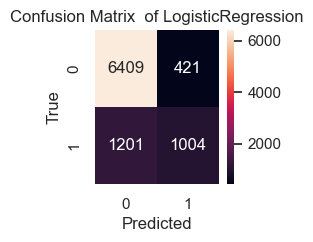

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6830
           1       0.70      0.46      0.55      2205

    accuracy                           0.82      9035
   macro avg       0.77      0.70      0.72      9035
weighted avg       0.81      0.82      0.81      9035

---------------- Evaluation of Decision Tree ------------------------------------------------
Evaluation of DecisionTreeClassifier(random_state=123):
Accuracy: 0.8038738240177089


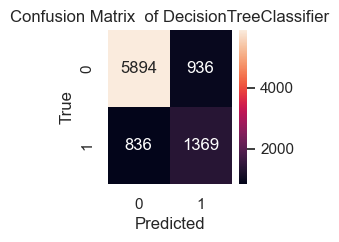

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      6830
           1       0.59      0.62      0.61      2205

    accuracy                           0.80      9035
   macro avg       0.73      0.74      0.74      9035
weighted avg       0.81      0.80      0.81      9035

---------------- Evaluation of Random Forest ------------------------------------------------
Evaluation of RandomForestClassifier(random_state=123):
Accuracy: 0.8531267293857222


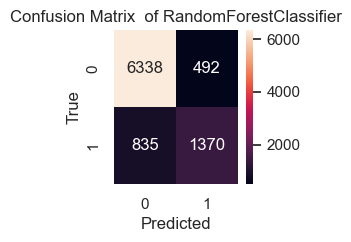

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      6830
           1       0.74      0.62      0.67      2205

    accuracy                           0.85      9035
   macro avg       0.81      0.77      0.79      9035
weighted avg       0.85      0.85      0.85      9035

---------------- Evaluation of KNN ------------------------------------------------
Evaluation of KNeighborsClassifier():
Accuracy: 0.8222468179302712


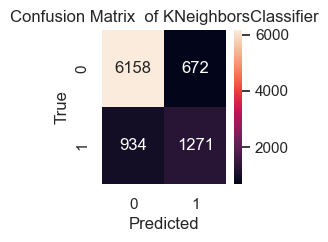

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      6830
           1       0.65      0.58      0.61      2205

    accuracy                           0.82      9035
   macro avg       0.76      0.74      0.75      9035
weighted avg       0.82      0.82      0.82      9035

---------------- Evaluation of SVM ------------------------------------------------
Evaluation of SVC(random_state=123):
Accuracy: 0.811289429994466


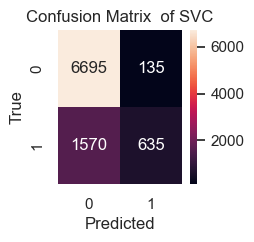

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      6830
           1       0.82      0.29      0.43      2205

    accuracy                           0.81      9035
   macro avg       0.82      0.63      0.66      9035
weighted avg       0.81      0.81      0.77      9035

---------------- Evaluation of Naive Bayes ------------------------------------------------
Evaluation of GaussianNB():
Accuracy: 0.7957941339236303


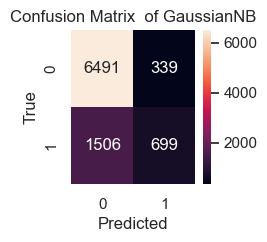

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      6830
           1       0.67      0.32      0.43      2205

    accuracy                           0.80      9035
   macro avg       0.74      0.63      0.65      9035
weighted avg       0.78      0.80      0.77      9035

---------------- Evaluation of Neural Network ------------------------------------------------
Evaluation of MLPClassifier(random_state=123):
Accuracy: 0.8515771997786387


/Users/parsa/lib/miniconda3/envs/mlp/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


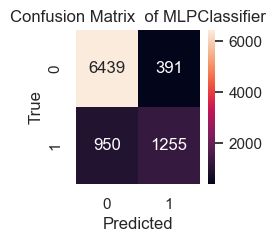

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      6830
           1       0.76      0.57      0.65      2205

    accuracy                           0.85      9035
   macro avg       0.82      0.76      0.78      9035
weighted avg       0.84      0.85      0.84      9035



In [538]:
models_eval = {}

for model_name, model in models.items():
    print(f'---------------- Evaluation of {model_name} ------------------------------------------------')
    models_eval[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test)


In [524]:
# Store in a dataframe as well
df_models = pd.DataFrame(models_eval.items(), columns=['Model', 'Accuracy'])

df_models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,0.853016
6,Neural Network,0.848035
3,KNN,0.822247
0,Logistic Regression,0.820476
4,SVM,0.811289
1,Decision Tree,0.801439
5,Naive Bayes,0.795794


## Fine-tuning the models

### Random Forest

In [525]:
# Random Forest implementation

model = models['Random Forest']

# params_rf = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [3, 5, 7],
#     'max_features': [0.2, 0.5, 0.8]
# }

# # Instantiate a 10-fold CV grid search object 'grid_dt'
# random_rf = RandomizedSearchCV(estimator=model,
#                                  param_distributions=params_rf,
#                                     scoring='accuracy',
#                                     cv=10,
#                                     n_jobs=-1,
# )

# # Fit 'grid_rf' to the training data
# random_rf.fit(X_train, y_train)

# # Extract best hyperparameters from 'grid_rf'
# best_hyperparams = random_rf.best_params_

# print('Best hyperparameters:\n', best_hyperparams)
best_hyperparams = {'max_depth': 7, 'max_features': 0.8, 'n_estimators': 300}

Evaluation of RandomForestClassifier(max_depth=7, max_features=0.8, n_estimators=300,
                       random_state=42):
Accuracy: 0.8496956281128943


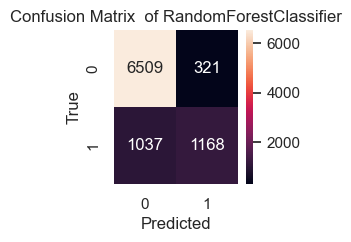

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      6830
           1       0.78      0.53      0.63      2205

    accuracy                           0.85      9035
   macro avg       0.82      0.74      0.77      9035
weighted avg       0.84      0.85      0.84      9035

Accuracy of Random Forest with best hyperparameters: 0.8496956281128943


In [526]:
rf = RandomForestClassifier(random_state=RANDOM_STATE,
                            n_estimators=best_hyperparams['n_estimators'],
                            max_depth=best_hyperparams['max_depth'],
                            max_features=best_hyperparams['max_features']
)

res = evaluate_model(rf, X_train, X_test, y_train, y_test)
print(f'Accuracy of Random Forest with best hyperparameters: {res}')
if(res > models_eval['Random Forest']):
    print(f'Random Forest with best hyperparameters has better accuracy than the default one: {res} > {models_eval["Random Forest"]}')
    models['Random Forest'] = rf
    models_eval['Random Forest'] = evaluate_model(rf, X_train, X_test, y_train, y_test)


### K-Nearest Neighbors

In [532]:
model = models['KNN']

params_knn = {
    'n_neighbors': [5,10, 20, 21, 22, 23, 24, 25, 30, 50],
}

# Instantiate a Grid search CV object 'random_knn'

grid_knn = GridSearchCV(estimator=model,
                                param_grid=params_knn,
                                scoring='accuracy',
                                cv=10,
                                n_jobs=-1,
)


# Fit 'grid_knn' to the training data
grid_knn.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_knn'
best_hyperparams = grid_knn.best_params_

print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'n_neighbors': 21}


Evaluation of KNeighborsClassifier(n_neighbors=21):
Accuracy: 0.8334255672385169


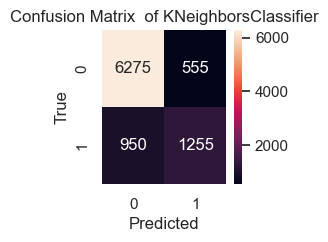

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      6830
           1       0.69      0.57      0.63      2205

    accuracy                           0.83      9035
   macro avg       0.78      0.74      0.76      9035
weighted avg       0.83      0.83      0.83      9035

Accuracy of KNN with best hyperparameters: 0.8334255672385169
KNN with best hyperparameters has better accuracy than the default one: 0.8334255672385169 > 0.8222468179302712
Evaluation of KNeighborsClassifier(n_neighbors=21):
Accuracy: 0.8334255672385169


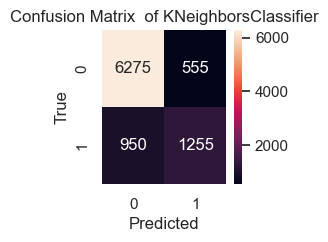

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      6830
           1       0.69      0.57      0.63      2205

    accuracy                           0.83      9035
   macro avg       0.78      0.74      0.76      9035
weighted avg       0.83      0.83      0.83      9035



In [533]:
knn = KNeighborsClassifier(n_neighbors=best_hyperparams['n_neighbors'])

res = evaluate_model(knn, X_train, X_test, y_train, y_test)
print(f'Accuracy of KNN with best hyperparameters: {res}')
if(res > models_eval['KNN']):
    print(f'KNN with best hyperparameters has better accuracy than the default one: {res} > {models_eval["KNN"]}')
    models['KNN'] = knn
    models_eval['KNN'] = evaluate_model(knn, X_train, X_test, y_train, y_test)


In [534]:
# Compare original KNN vs. Fine tuned KNN
df_models = pd.DataFrame(models_eval.items(), columns=['Model', 'Accuracy'])

df_models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,0.853016
6,Neural Network,0.848035
3,KNN,0.833426
0,Logistic Regression,0.820476
4,SVM,0.811289
1,Decision Tree,0.801439
5,Naive Bayes,0.795794
